In [86]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

In [34]:
#Importing CSV files
#important DFs to use:
agroFood_df = pd.read_csv('Resources/Agrofood_co2_emission.csv')
cc_Impact_Agri_df = pd.read_csv('Resources/climate_change_impact_on_agriculture_2024.csv')
co2_Country_df = pd.read_csv('Resources/co2_emissions_kt_by_country.csv')
owid_co2_c_df = pd.read_csv('Resources/owid-co2-data.csv')
pesticide_use_df = pd.read_csv('Resources/pesticide-use-tonnes.csv')

#unimportant for now
infant_Mortality = pd.read_csv('Resources/infant-mortality-rates.csv')
life_expectancy_df = pd.read_csv('Resources/life expectancy.csv')
life_expectancy_birth_df = pd.read_csv('Resources/life-expectancy-hmd-unwpp.csv')
child_mort_v_hExpend = pd.read_csv('Resources/HealthcareSpendingData/child-mortality-vs-health-expenditure.csv')
hInsure_US_df = pd.read_csv('Resources/HealthcareSpendingData/health-insurance-coverage-in-the-us.csv')
health_protection_coverage_df = pd.read_csv('Resources/HealthcareSpendingData/health-protection-coverage.csv')
healthcare_expend_vGDP_df = pd.read_csv('Resources/HealthcareSpendingData/healthcare-expenditure-vs-gdp.csv')
healthcare_hypoVSactu_spend_df = pd.read_csv('Resources/HealthcareSpendingData/how-much-we-think-we-spend-on-healthcare-vs-how-much-we-actually-do.csv')
life_expectancy_v_health_expend_df = pd.read_csv('Resources/HealthcareSpendingData/life-expectancy-vs-health-expenditure.csv')
US_people_no_health_df = pd.read_csv('Resources/HealthcareSpendingData/percentage-of-persons-without-health-insurance-coverage-us.csv')
public_health_expend_GDPdf = pd.read_csv('Resources/HealthcareSpendingData/public-health-expenditure-share-gdp.csv')
public_health_insur_cover_df = pd.read_csv('Resources/HealthcareSpendingData/public-health-insurance-coverage.csv')
private_expend_health_df = pd.read_csv('Resources/HealthcareSpendingData/share-of-out-of-pocket-expenditure-on-healthcare.csv')
Private_expend_GDPdf = pd.read_csv('Resources/HealthcareSpendingData/share-of-out-of-pocket-expenditure-vs-gdp-per-capita.csv')
tax_public_health_df = pd.read_csv('Resources/HealthcareSpendingData/tax-revenue-per-capita-and-public-health-spending-per-capita-in-developing-countries-in.csv')
total_health_gdp_df = pd.read_csv('Resources/HealthcareSpendingData/total-healthcare-expenditure-gdp.csv')


#possibly useful
Country_population_df = pd.read_csv('Resources/population.csv')
world_data_df = pd.read_csv('Resources/world-data-2023.csv')


# df = pd.read_csv('Resources/life-expectancy-vs-healthcare-expenditure.csv')




In [35]:

agroFood_df.head()


,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [36]:
agroFood_df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [37]:
cc_Impact_Agri_df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [38]:
cc_Impact_Agri_df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [39]:
co2_Country_df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [40]:
co2_Country_df.columns

Index(['country_code', 'country_name', 'year', 'value'], dtype='object')

In [41]:
owid_co2_c_df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.157,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [42]:
owid_co2_c_df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [43]:
pesticide_use_df.head()
print(len(pesticide_use_df))

7705


In [44]:
pesticide_use_df.columns

Index(['Entity', 'Code', 'Year',
       'Pesticides (total) | 00001357 || Agricultural Use | 005157 || Tonnes'],
      dtype='object')

In [45]:
cc_Impact_Agri_df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [46]:
#For testing to see correlation between co2 emissions and pesticide use
#use dataframes cc_impactacc_Impact_Agri_df, and check against pesticidepesticide_use_df
#columns interested for this analysis: Year, Country, Co2_Emissions_MT, Pesticide_Use_KG_per_HA

#For first part of analysis conduct exploration on a country with guaranteed high CO2 emissions,
#possibly US or just any country that gets the max co2 on dataset
simplified_ccI_df = cc_Impact_Agri_df.drop(columns = ['Average_Temperature_C',
       'Total_Precipitation_mm','Extreme_Weather_Events', 'Irrigation_Access_%','Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'])
simplified_ccI_sorted_df = simplified_ccI_df.sort_values(by=["Country","Year"])
simplified_ccI_sorted_df


,Year,Country,Region,Crop_Type,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA
188,1990,Argentina,Pampas,Wheat,25.88,4.383,20.34,60.94
794,1990,Argentina,Northeast,Fruits,6.89,3.700,43.73,23.63
1343,1990,Argentina,Northeast,Corn,11.03,2.360,37.02,51.92
1416,1990,Argentina,Northeast,Coffee,5.97,0.970,26.03,56.52
1833,1990,Argentina,Pampas,Coffee,29.79,2.646,3.61,35.97
...,...,...,...,...,...,...,...,...
9550,2024,USA,West,Sugarcane,10.15,1.190,48.95,14.25
9577,2024,USA,South,Cotton,26.52,1.611,11.16,34.47
9583,2024,USA,Northeast,Sugarcane,10.56,3.080,15.54,67.41
9629,2024,USA,South,Corn,20.52,2.205,0.35,98.67


In [47]:
#Finding countries with the highest amount of recorded pesticide usage in a year
max_pest_use = simplified_ccI_sorted_df['Pesticide_Use_KG_per_HA'].max()
row_max_pest_use = simplified_ccI_sorted_df[simplified_ccI_sorted_df['Pesticide_Use_KG_per_HA'] == max_pest_use]
row_max_pest_use

,Year,Country,Region,Crop_Type,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA
7581,2018,Canada,Ontario,Vegetables,29.06,2.322,49.99,8.87
8985,2022,China,East,Wheat,9.55,0.570,49.99,77.22
1814,2019,India,Punjab,Coffee,22.75,3.006,49.99,46.46


In [48]:
#Finding countries with the highest amount of CO2 emissions in a year
max_co2_emi = simplified_ccI_sorted_df['CO2_Emissions_MT'].max()
row_max_co2_emi = simplified_ccI_sorted_df[simplified_ccI_sorted_df['CO2_Emissions_MT'] == max_co2_emi]
row_max_co2_emi

,Year,Country,Region,Crop_Type,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA
5067,1998,Australia,New South Wales,Wheat,30.0,1.890,17.85,9.72
1423,1998,India,Punjab,Wheat,30.0,3.663,15.03,75.86


In [56]:
#Data exploration showed that India has both the highest Co2 emissions and the highest pesticide use
#Will attempt to make plot using this data in mind
india_df = simplified_ccI_sorted_df[simplified_ccI_sorted_df['Country'] == 'India']
india_coffee_df = india_df[india_df['Crop_Type'] =='Coffee']
# india_df
# india_coffee_df

,Year,Country,Region,Crop_Type,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA
2435,1991,India,Maharashtra,Coffee,15.07,1.503,6.97,38.14
8953,1991,India,Maharashtra,Coffee,9.82,2.000,8.62,94.65
2084,1992,India,Tamil Nadu,Coffee,11.23,2.610,18.68,10.13
3870,1992,India,Maharashtra,Coffee,7.70,3.570,13.26,85.57
8708,1992,India,Tamil Nadu,Coffee,27.54,3.402,33.51,26.81
...,...,...,...,...,...,...,...,...
8458,2023,India,Punjab,Coffee,25.63,1.161,1.06,68.53
2076,2024,India,Punjab,Coffee,23.67,2.097,32.05,71.28
2706,2024,India,Maharashtra,Coffee,18.12,1.296,15.46,30.49
7093,2024,India,Punjab,Coffee,3.72,4.760,42.62,75.25


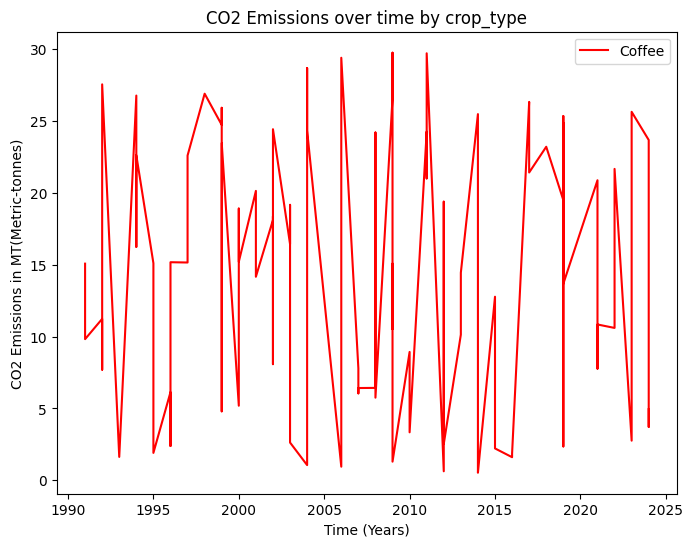

In [54]:
#plot of co2 emissions over time in india/coffee
india_coffee_df = india_df[india_df['Crop_Type'] =='Coffee']
plt.figure(figsize=(8,6))

plt.plot(india_coffee_df['Year'], india_coffee_df['CO2_Emissions_MT'], linestyle='-',
         color='red', label='Coffee')
plt.title('CO2 Emissions over time by crop_type')
plt.xlabel('Time (Years)')
plt.ylabel('CO2 Emissions in MT(Metric-tonnes)')

plt.legend()
plt.show()

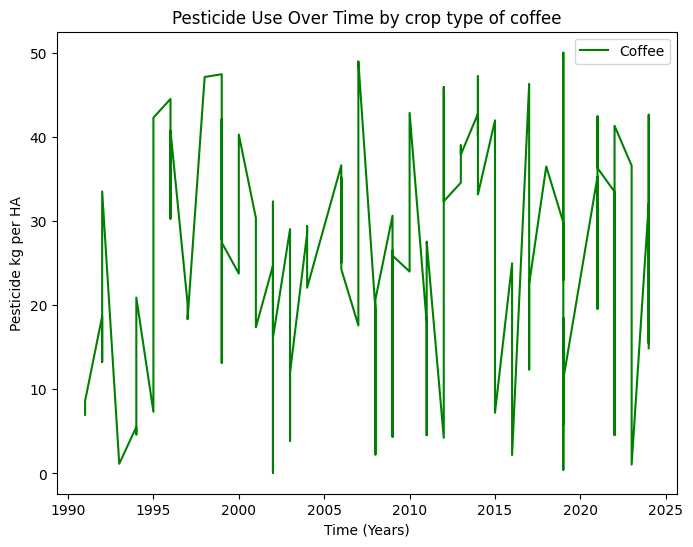

In [65]:
#line plot of pesticide use over time in india/coffee
plt.figure(figsize=(8,6))

plt.plot(india_coffee_df['Year'], india_coffee_df['Pesticide_Use_KG_per_HA'], linestyle='-',
         color='green', label='Coffee')
plt.title('Pesticide Use Over Time by crop type of coffee')
plt.xlabel('Time (Years)')
plt.ylabel('Pesticide kg per HA')

plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

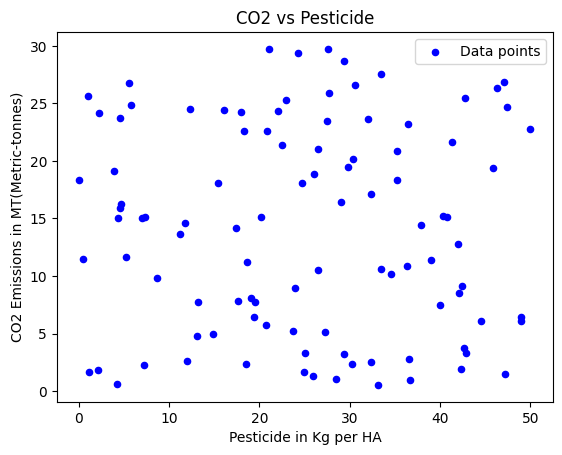

In [82]:
#scatter plot of pesticide use and co2 emissions for india/crop-coffee

# india_coffee_df['CO2_Emissions_MT'] = india_coffee_df['Pesticide_Use_KG_per_HA']*2 + 
#                                         np.random.normal(0,0.1,size=len(india_coffee_df))

plt.figure(figsize=(8,6))

india_coffee_df.plot.scatter(x='Pesticide_Use_KG_per_HA', 
                             y='CO2_Emissions_MT', color='blue')
plt.title('CO2 vs Pesticide')
plt.xlabel('Pesticide in Kg per HA')
plt.ylabel('CO2 Emissions in MT(Metric-tonnes)')

plt.legend(['Data points'])
plt.show()

# correlation = india_coffee_df.corr().loc['Pesticide_Use_KG_per_HA', 'CO2_Emissions_MT']
# print(f'Correlation coefficient between X and Y: {correlation:.2f}')

In [71]:
#Consider the possibility that it would be better to include the total pesticide usage
# each year by combining the values of all pesticide use in each year regardless of crop typej
#as well as the values for CO2 emissions
india_df
grouped_holder = india_df.groupby('Year').agg({'Pesticide_Use_KG_per_HA': 'sum',
                                               'CO2_Emissions_MT': 'sum'})
india_grouped_df = grouped_holder.reset_index()

india_grouped_df

,Year,Pesticide_Use_KG_per_HA,CO2_Emissions_MT
0,1990,595.25,286.88
1,1991,775.97,577.08
2,1992,834.04,516.58
3,1993,326.80,256.03
4,1994,531.02,340.21
5,1995,834.97,385.80
6,1996,583.76,374.46
7,1997,728.07,405.62
8,1998,930.25,503.89
9,1999,693.33,519.16


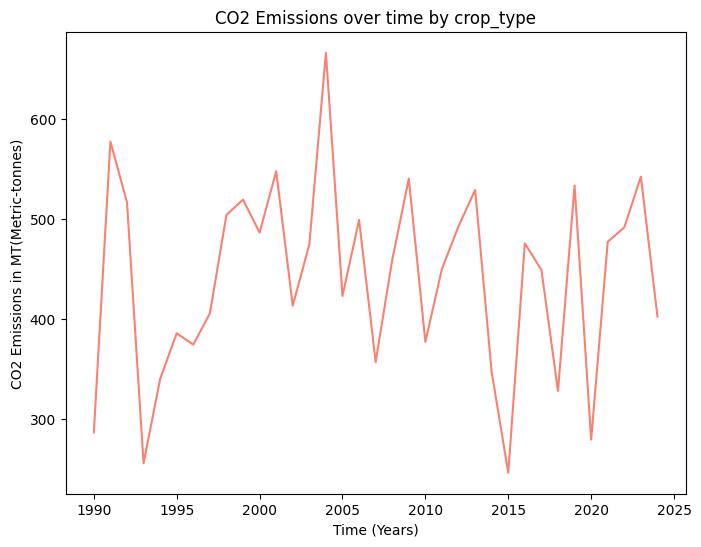

In [78]:
#plot of co2 over time in india, all crops

plt.figure(figsize=(8,6))

plt.plot(india_grouped_df['Year'], india_grouped_df['CO2_Emissions_MT'], linestyle='-',
         color='salmon')
plt.title('CO2 Emissions over time by crop_type')
plt.xlabel('Time (Years)')
plt.ylabel('CO2 Emissions in MT(Metric-tonnes)')


plt.show()

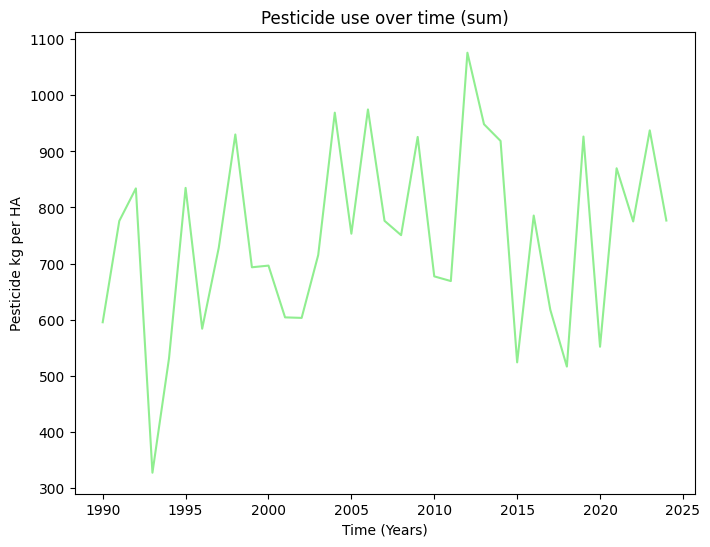

In [79]:
#plot of pesticide over time in india, all crops

plt.figure(figsize=(8,6))

plt.plot(india_grouped_df['Year'], india_grouped_df['Pesticide_Use_KG_per_HA'], linestyle='-',
         color='lightgreen')
plt.title('Pesticide use over time (sum)')
plt.xlabel('Time (Years)')
plt.ylabel('Pesticide kg per HA')


plt.show()

The correlation between Pesticide Use and CO2 Emissions is 0.68


<Figure size 800x600 with 0 Axes>

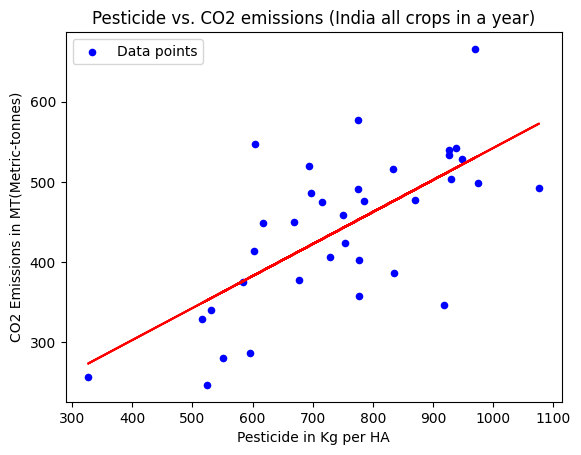

In [93]:
#scatter plot of 
x_axis_india = india_grouped_df['Pesticide_Use_KG_per_HA']
y_axis_india = india_grouped_df['CO2_Emissions_MT']

correlation = st.pearsonr(x_axis_india,y_axis_india)
print(f"The correlation between Pesticide Use and CO2 Emissions is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_india, y_axis_india)
regress_values = x_axis_india * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6))
india_grouped_df.plot.scatter(x='Pesticide_Use_KG_per_HA', 
                             y='CO2_Emissions_MT', color='blue')
plt.plot(x_axis_india,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.title('Pesticide vs. CO2 emissions (India all crops in a year)')
plt.xlabel('Pesticide in Kg per HA')
plt.ylabel('CO2 Emissions in MT(Metric-tonnes)')

plt.legend(['Data points'])
plt.show()


The correlation between Pesticide Use and CO2 Emissions is 0.85


<Figure size 800x600 with 0 Axes>

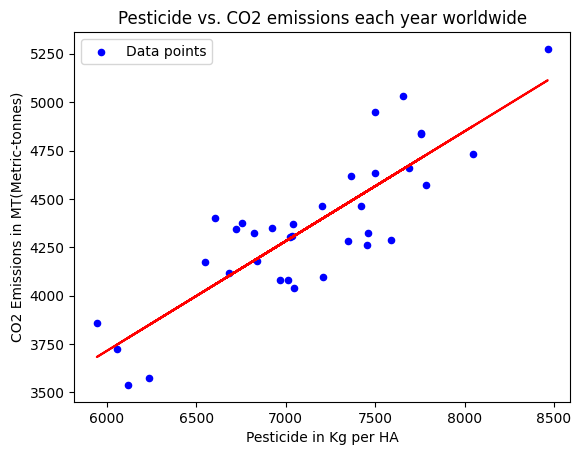

In [100]:
#Creating scatter plot using summation of all country's pesticide use per year by all 
#country's co2 emissions per year
simplified_ccI_sorted_df
grouped_holder_world = simplified_ccI_sorted_df.groupby('Year').agg({'Pesticide_Use_KG_per_HA': 'sum',
                                                             'CO2_Emissions_MT': 'sum'})
world_grouped_df = grouped_holder_world.reset_index()
# world_grouped_df

#scatter plot of 
x_axis_world = world_grouped_df['Pesticide_Use_KG_per_HA']
y_axis_world = world_grouped_df['CO2_Emissions_MT']

correlation = st.pearsonr(x_axis_world,y_axis_world)
print(f"The correlation between Pesticide Use and CO2 Emissions is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_world, y_axis_world)
regress_values = x_axis_world * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6))
world_grouped_df.plot.scatter(x='Pesticide_Use_KG_per_HA', 
                             y='CO2_Emissions_MT', color='blue')
plt.plot(x_axis_world,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.title('Pesticide vs. CO2 emissions each year worldwide')
plt.xlabel('Pesticide in Kg per HA')
plt.ylabel('CO2 Emissions in MT(Metric-tonnes)')

plt.legend(['Data points'])
plt.show()


In [111]:
#List of all country names in dataset
country_names = simplified_ccI_sorted_df["Country"].unique()
country_names_list = country_names.tolist()
country_names_list


['Argentina',
 'Australia',
 'Brazil',
 'Canada',
 'China',
 'France',
 'India',
 'Nigeria',
 'Russia',
 'USA']

In [120]:
simplified_ccI_sorted_df
grouped_holder_country =simplified_ccI_sorted_df.groupby(['Year', 'Country']).agg({'Pesticide_Use_KG_per_HA': 'sum',
                                               'CO2_Emissions_MT': 'sum'})
country_grouped_df = grouped_holder_country.reset_index()
country_grouped_df

,Year,Country,Pesticide_Use_KG_per_HA,CO2_Emissions_MT
0,1990,Argentina,657.71,403.01
1,1990,Australia,534.37,422.23
2,1990,Brazil,383.34,230.22
3,1990,Canada,698.24,344.53
4,1990,China,836.59,480.18
...,...,...,...,...
345,2024,France,631.03,448.41
346,2024,India,776.71,402.40
347,2024,Nigeria,633.88,372.67
348,2024,Russia,541.61,375.54


In [133]:
#Creating iterable means of creating graphs for each country
country_dict = {}
for _, row in country_grouped_df.iterrows():
    country = row['Country']
    year = row['Year']
    if country not in country_dict:
        country_dict[country] = {'Year': [], 'Pesticide_Use_KG_per_HA': [], 'CO2_Emissions_MT': []}
    country_dict[country]['Year'].append(year)
    country_dict[country]['Pesticide_Use_KG_per_HA'].append(row['Pesticide_Use_KG_per_HA'])
    country_dict[country]['CO2_Emissions_MT'].append(row['CO2_Emissions_MT'])
# country_dict

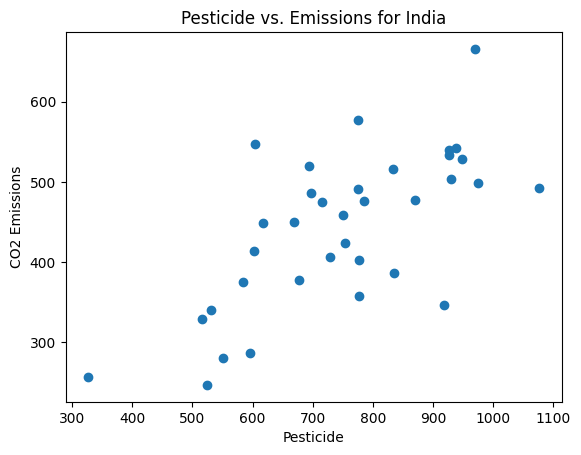

In [132]:
def plot_pest_emi(country):
    if country in country_dict:

        years = country_dict[country]['Year']
        pest_val = country_dict[country]['Pesticide_Use_KG_per_HA']
        emi_val = country_dict[country]['CO2_Emissions_MT']
        
        # correlation = st.pearsonr(pest_val,emi_val)
        # print(f"The correlation between Pesticide Use and CO2 Emissions is {round(correlation[0],2)}")
        # (slope, intercept, rvalue, pvalue, stderr) = linregress(pest_val, emi_val)
        # regress_values = pest_val * slope + intercept
        # line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


        plt.scatter(pest_val, emi_val)
        plt.title(f'Pesticide vs. Emissions for {country}')
        plt.xlabel('Pesticide')
        plt.ylabel('CO2 Emissions')
        plt.show()
    else: 
        print(f'No data for {country}')
plot_pest_emi('India')

In [ ]:
x_axis_world = world_grouped_df['Pesticide_Use_KG_per_HA']
y_axis_world = world_grouped_df['CO2_Emissions_MT']

correlation = st.pearsonr(x_axis_world,y_axis_world)
print(f"The correlation between Pesticide Use and CO2 Emissions is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_world, y_axis_world)
regress_values = x_axis_world * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6))
world_grouped_df.plot.scatter(x='Pesticide_Use_KG_per_HA', 
                             y='CO2_Emissions_MT', color='blue')
plt.plot(x_axis_world,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.title('Pesticide vs. CO2 emissions each year worldwide')
plt.xlabel('Pesticide in Kg per HA')
plt.ylabel('CO2 Emissions in MT(Metric-tonnes)')

plt.legend(['Data points'])
plt.show()